In [1]:
# Adapted from https://github.com/Po-Hsun-Su/pytorch-ssim/blob/master/max_ssim.py

import torch
from torch.autograd import Variable
from torch import optim
from PIL import Image
import numpy as np
import sys, os
import torch.nn.functional as F
# sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(__file__))))
from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
npImg1 = np.array(Image.open("../data/800px-Fox_Hunt_1893_Winslow_Homer.jpg"))
print(npImg1.shape)


(443, 800, 3)


In [2]:
#img1 = torch.from_numpy(npImg1).float().unsqueeze(0).unsqueeze(0)/255.0
img1 = torch.from_numpy(npImg1).float().unsqueeze(0)/255.0
img2 = torch.rand(img1.size())

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

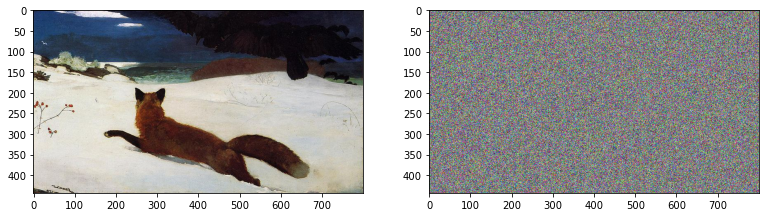

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img1.squeeze().numpy())
ax2.imshow(img2.squeeze().detach().numpy())

In [5]:
print(img1.min(), img1.max())

tensor(0.) tensor(1.)


In [6]:
if torch.cuda.is_available():
    img1 = img1.cuda()
    img2 = img2.cuda()

In [7]:
print(img1.shape)
img1 = img1.permute(0, 3, 1, 2)
img2 = img2.permute(0, 3, 1, 2)
print(img1.shape)

torch.Size([1, 443, 800, 3])
torch.Size([1, 3, 443, 800])


In [8]:
img1 = Variable( img1,  requires_grad=False)
img2 = Variable( img2,  requires_grad=True)

In [9]:
ssim_value = ssim(img1, img2).item()
print("Initial ssim:", ssim_value)

ssim_loss = SSIM(win_size=11, win_sigma=1.5, data_range=1, size_average=True) #, channel=3)
# ms_ssim_loss = 1 - ms_ssim( X, Y, data_range=255, size_average=True )

optimizer = optim.SGD([img2], lr=0.05, momentum=.9, nesterov=True)
optimizer = optim.Adam([img2], lr=0.05)

while ssim_value < 0.9999:
    optimizer.zero_grad()
    #_ssim_loss = 1 - ms_ssim(img1, img2, data_range=1., size_average=True )
    _ssim_loss = 1 - ssim_loss(img1, img2)
    _ssim_loss.backward()
    optimizer.step()

    ssim_value = ssim(img1, img2).item()
    print(ssim_value)

#img2_ = (img2 * 255.0).squeeze()
#np_img2 = img2_.detach().cpu().numpy().astype(np.uint8)
#Image.fromarray(np_img2).save('results.png')

Initial ssim: 0.983307421207428


/usr/local/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:125: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output contiguous tensor even if some of the inputs are in channels_last format. (Triggered internally at  /tmp/pip-req-build-as628lz5/aten/src/ATen/native/TensorIterator.cpp:918.)
  Variable._execution_engine.run_backward(


0.983842134475708
0.9844028353691101
0.9849879145622253
0.9855911135673523
0.986205518245697
0.986825168132782
0.9874467253684998
0.9880685806274414
0.9886947274208069
0.9893274307250977
0.9899682998657227
0.9906079173088074
0.9912286400794983
0.9918129444122314
0.992347002029419
0.9928248524665833
0.9932458400726318
0.9936161041259766
0.993943452835083
0.9942405223846436
0.9945182800292969
0.994785487651825
0.9950491786003113
0.9953091740608215
0.9955654144287109
0.9958146214485168
0.9960542321205139
0.99628084897995
0.9964922070503235
0.9966867566108704
0.9968643188476562
0.9970253109931946
0.9971702098846436
0.9972997307777405
0.9974139332771301
0.997514545917511
0.9976040720939636
0.9976885318756104
0.9977698922157288
0.9978472590446472
0.997922420501709
0.9979956746101379
0.9980661273002625
0.998135507106781
0.9982026219367981
0.9982673525810242
0.9983294606208801
0.9983921051025391
0.9984535574913025
0.9985122084617615
0.9985694885253906
0.9986236691474915
0.998676598072052
0.998

In [10]:
print(img2.min(), img2.max())

tensor(-0.0543, grad_fn=<MinBackward1>) tensor(1.0083, grad_fn=<MaxBackward1>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


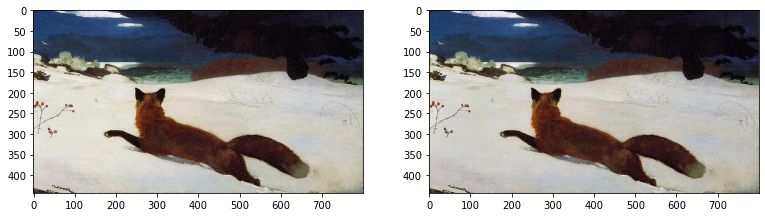

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img1.squeeze().permute(1, 2, 0).numpy())
ax2.imshow(img2.squeeze().permute(1, 2, 0).detach().numpy());